In [101]:
import random
A_length = []
A_weight = []
for i in range(35):
    A_length.append(random.uniform(20,45))
    A_weight.append(random.uniform(200,950))
A_length.sort()    
A_weight.sort()

B_length = []
B_weight = []
for i in range(14):
    B_length.append(random.uniform(9,15))
    B_weight.append(random.uniform(6,20))
B_length.sort()    
B_weight.sort()
length = A_length+B_length
weight = A_weight+B_weight

In [102]:
length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [103]:
import numpy as np
data = np.column_stack((length,weight))

In [104]:
data[:6]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ],
       [ 29.7, 450. ]])

In [105]:
target = np.concatenate( (np.ones(35), np.zeros(14)) )
target[:6]

array([1., 1., 1., 1., 1., 1.])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_input,test_input,train_target,test_target = train_test_split(data,target,random_state=42)

In [108]:
train_input.shape, test_input.shape, train_target.shape,  test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [109]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

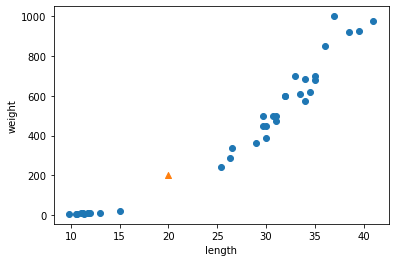

In [110]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20,200, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [111]:
distance, indexes =  kn.kneighbors([[20,400]])

In [112]:
distance, indexes

(array([[14.14213562, 38.07886553, 50.93220985, 50.99019514, 60.35105633]]),
 array([[31,  1, 15,  0, 21]], dtype=int64))

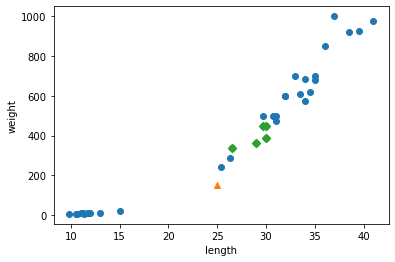

In [113]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

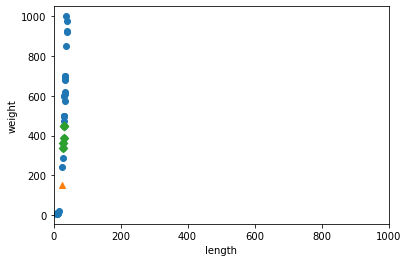

In [114]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [115]:
# 스케일링
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [116]:
mean, std

(array([ 26.175     , 418.08888889]), array([ 10.21073441, 321.67847023]))

In [117]:
train_scaled = (train_input-mean) / std

In [118]:
train_scaled

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357],
       [-1.29030875, -1.26178444],
       [ 0.57047806,  0.56550602],
       [ 0.44316107,  0.2546366 ],
       [ 0.66841421,  0.87637544],
       [ 0.86428651,  0.87637544],
       [ 1.4519034 ,  1.73126635],
       [ 1.20706303,  1.56028817],
       [-0.07590051, -0.54740651],
       [-1.3882449 , -1.26924531],
       [ 1.30499918,  1.57583164],
       [ 0.34522492,  0.09920189],
       [ 1.06015881,  1.80898371],
       [ 0.47254192,  0.2546366 ],
       [-1.53514913, -1.2763953 ],
       [ 0.01224202, -0.39818919],
       [ 0.76635036,  0.82974503],
       [ 0.03182925, -0.24275448],
       [-1.52535551, -1.27794965],
       [-1.60370443, -1.27888226],
       [ 0.86428651,  0.81420156],
       [-1.46659382, -1.26924531],
       [ 0.47254192,  0.17691924],
       [ 0.81531843,  0.6276799 ],
       [ 0.71738229,

### 전처리 데이터로 모델 훈련하기

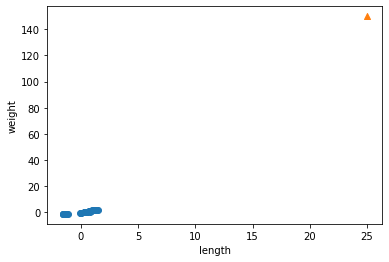

In [119]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()            

In [120]:
new_target = ([25,150]-mean)/std

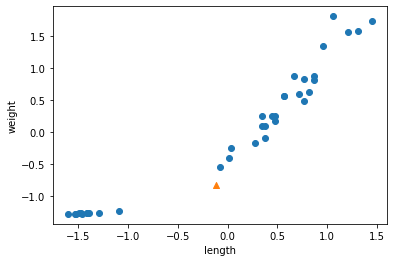

In [121]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_target[0],new_target[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()   

### 훈련데이터를 표준화(정규화) - scaling 한 값을 학습에 적용

In [122]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

### 검증데이터도 표준화

In [123]:
test_scaled= (test_input-mean)/std

In [124]:
kn.score(test_scaled, test_target)

1.0

In [125]:
kn.predict([new_target])

array([1.])

In [126]:
distance, indexes = kn.kneighbors([new_target])

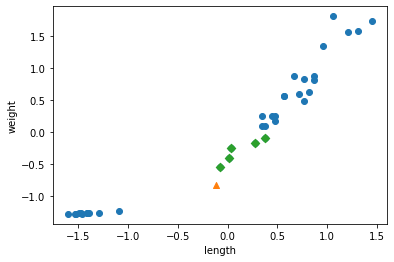

In [127]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_target[0],new_target[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')  # 찾고자하는 좌표와 가장 가까이 있는 이웃(기본 5)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 1. 훈련용 데이터와 평가용 데이터를 잘 섞어서 나눈다.
##    사이킷런의 라이브러리를 이용해서 학습용과 테스트용으로 나눈다.
## 2. 데이터의 스케일링을 맞춘다.
##    사이킷런의 scaling 함수를 이용한다
## 3. 적합한 머신러닝을 선택
##    분류문제 , kneighbors를 이용